<a href="https://colab.research.google.com/github/iamgiribabu/insurance_premium_prediction/blob/main/insurance_premium_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
data = pd.read_csv('/content/Health_insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [98]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [99]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [101]:
print(data['sex'].value_counts())
print("-"*50)
print(data['sex'].value_counts(normalize=True)*100)
print("*"*50)
print(data['smoker'].value_counts())
print("-"*50)
print(data['smoker'].value_counts(normalize=True)*100)

sex
male      676
female    662
Name: count, dtype: int64
--------------------------------------------------
sex
male      50.523169
female    49.476831
Name: proportion, dtype: float64
**************************************************
smoker
no     1064
yes     274
Name: count, dtype: int64
--------------------------------------------------
smoker
no     79.521674
yes    20.478326
Name: proportion, dtype: float64


In [127]:
data['age'].max()

64

<Axes: xlabel='sex', ylabel='age'>

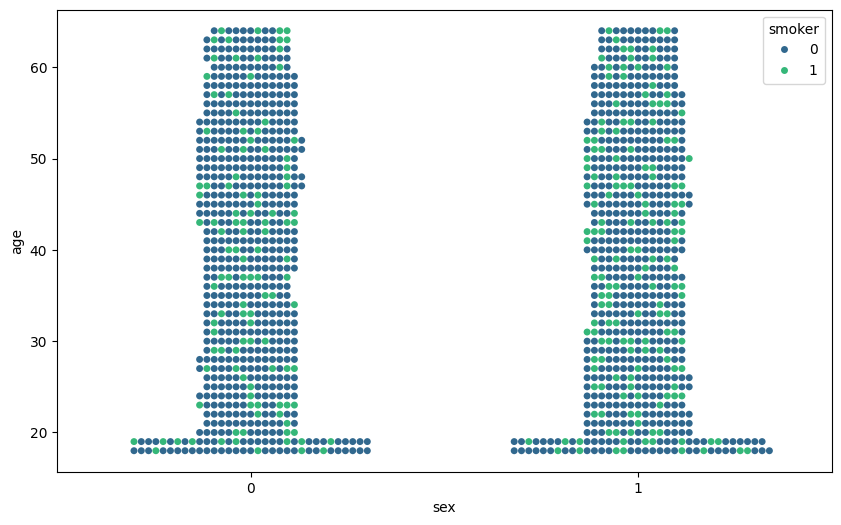

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.swarmplot(data=data, x='sex', y='age', hue='smoker', palette='viridis')


<Axes: xlabel='smoker', ylabel='age'>

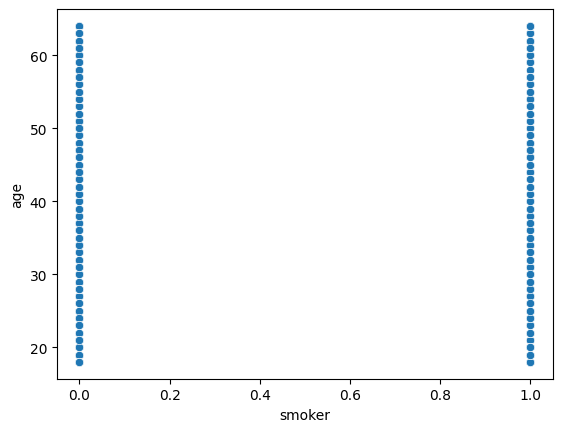

In [136]:
sns.scatterplot(data=data, y='age',x ='smoker')

<Axes: xlabel='sex', ylabel='count'>

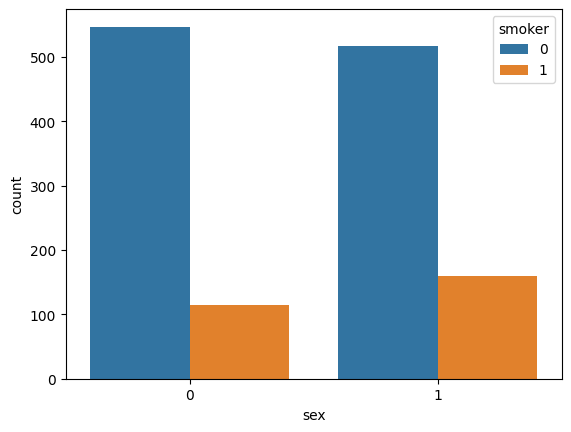

In [138]:
sns.countplot(data=data, x='sex', hue='smoker')

In [103]:
data['sex'] = data['sex'].map({'male': 1, 'female': 0}).astype(int)
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0}).astype(int)

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


<Axes: >

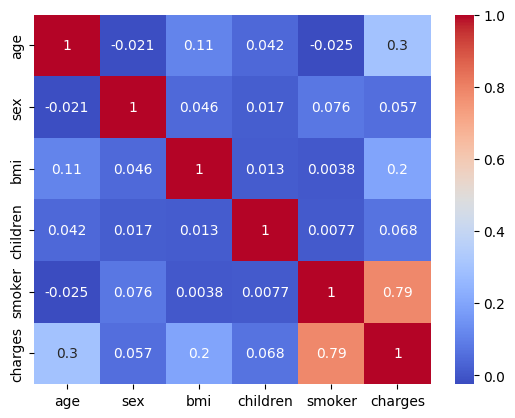

In [105]:
sns.heatmap(data[['age', 'sex', 'bmi', 'children', 'smoker', 'charges']].corr(), annot=True, cmap='coolwarm')

In [106]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [107]:
X = data[["age", "sex", "bmi", "smoker"]]
y = data['charges']

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
from sklearn.linear_model import LinearRegression

ln_model = LinearRegression()
ln_model.fit(X_train, y_train)


y_pred = ln_model.predict(X_test)

In [110]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

Mean Squared Error: 34515553.666804485
RMSE: 5874.993929086607
R2 Score: 0.7776757765738431


In [111]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [112]:
y_pred = model.predict(X_test)

In [113]:
Predicted_data = pd.DataFrame(data={"Predicted Premium Amount": y_pred})
print(Predicted_data.head())

   Predicted Premium Amount
0              10193.107081
1               5666.292098
2              28360.424070
3               9427.642177
4              34794.720369


In [114]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)


Mean Squared Error: 23705545.484604333
RMSE: 4868.834099104664
R2 Score: 0.847306027837912


In [115]:
#hyperparameter tuning

parameter_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(model, parameter_grid, cv=5 )
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 20135348.051933493


In [116]:
print(best_params)

print(best_model)

{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
RandomForestRegressor(max_depth=5, min_samples_leaf=4, n_estimators=200)


In [117]:
model = RandomForestRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=5,
                      n_estimators=300)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=5,
                      n_estimators=300)

In [118]:
y_pred = model.predict(X_test)

In [119]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

Mean Squared Error: 20201338.741154257
RMSE: 4494.589941379998
R2 Score: 0.8698775922544352


In [120]:
X = data[["age", "bmi", "smoker"]]
y = data['charges']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

ln_model = LinearRegression()
ln_model.fit(X_train, y_train)


y_pred = ln_model.predict(X_test)


from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

Mean Squared Error: 34512843.8802279
RMSE: 5874.763304187489
R2 Score: 0.7776932310583374


In [121]:
model = RandomForestRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=5,
                      n_estimators=300)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)


Mean Squared Error: 20218908.20969356
RMSE: 4496.544029551313
R2 Score: 0.8697644224502733
